# **Waste Material Segregation for Improving Waste Management**
### By **Tejashri Pilla (ML-C72)**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries

# For Data Manipulation
import numpy as np
import pandas as pd

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# For model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# For Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Load the dataset.

In [3]:
# Load and unzip the dataset
import zipfile
import os

# Path to the ZIP file
zip_path = 'data.zip'

# Directory to extract to
extract_dir = 'waste_data'

#check if zipfile exist
if os.path.exists(zip_path):
    # Unzip the dataset
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        if(os.path.exists(os.path.join(extract_dir, "data"))):
            # Check if the directory already exists
            print(f"Directory {extract_dir} already exists. Please remove it before extracting.")
            exit(1)
        else:
            zip_ref.extractall(extract_dir)
            print(f'Data successfully extracted to {extract_dir}.')
else:
    print(f"Zip file not found at {zip_path}. Please check the path.")

Data successfully extracted to waste_data.


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [4]:
# Create a function to load the raw images
def load_images(directory):
    data = tf.keras.utils.image_dataset_from_directory( # simplest and most efficient way to load image data from directory in TensorFlow 
    directory,
    seed=123,                       # Seed for reproducibility
    image_size=(128, 128),          # Resize all images
    batch_size=7625
    )              
    return data

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [5]:
# Get the images and their labels
# Define the directory to load images from
dir = 'waste_data/data'

# Use the function defined above to load images and labels
image_data = load_images(dir)

Found 7625 files belonging to 7 classes.


In [6]:
#Check the labels for loaded images
labels_cat = image_data.class_names
print("Class names:", labels_cat)

Class names: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


In [7]:
from collections import Counter

# Function to Count occurrences of each label index in the dataset
def count_images_per_category(dataset):
    label_counter = Counter()
    
    for images, labels in dataset:
        labels = labels.numpy()     # convert tensor to numpy
        label_counter.update(labels)

    return label_counter

In [8]:
#Use above function to count images per category
image_counts = count_images_per_category(image_data)

print("Image count category wise:")
for idx, count in sorted(image_counts.items()):
    print(f"{labels_cat[idx]}: {count}")

Image count category wise:
Cardboard: 540
Food_Waste: 1000
Glass: 750
Metal: 1000
Other: 1010
Paper: 1030
Plastic: 2295


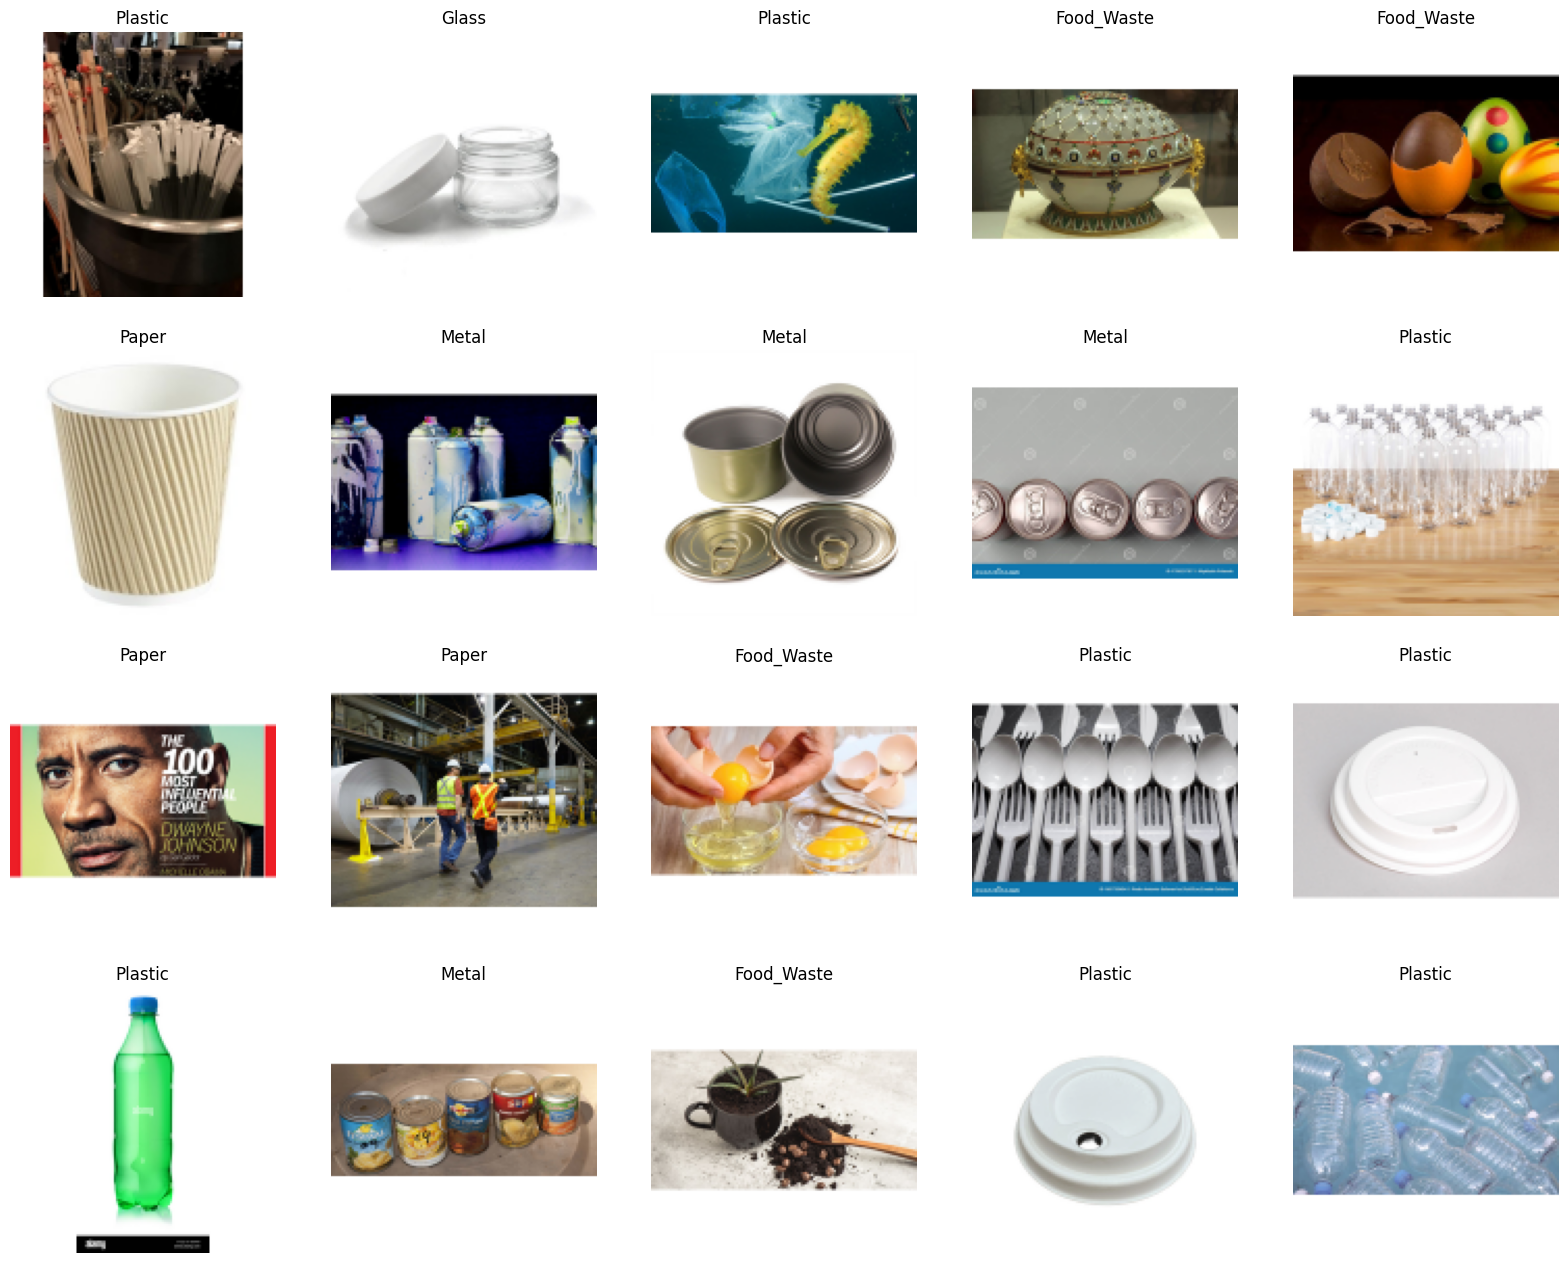

In [9]:
#Verifying images and labels loaded correctly or not
for images, labels in image_data.take(1):
    plt.figure(figsize=(20, 20))
    for i in range(20): 
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels_cat[labels[i]])
        plt.axis("off")


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

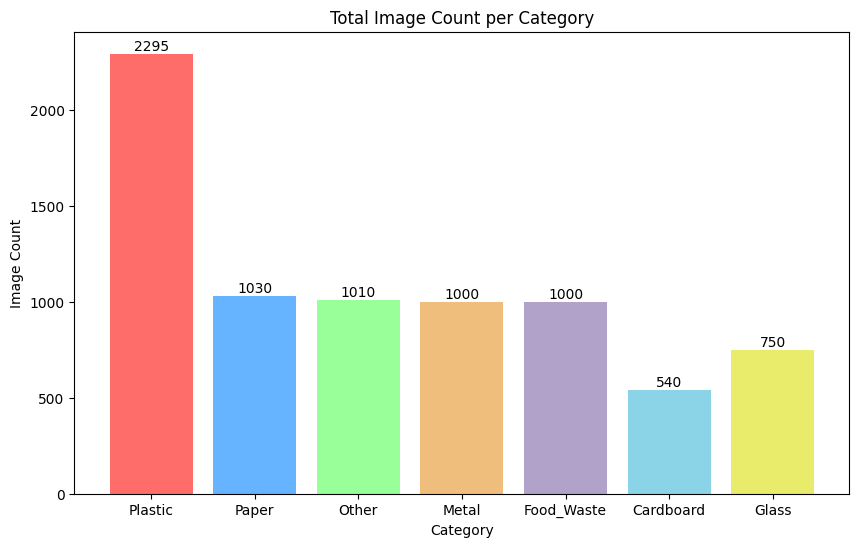

In [10]:
# Visualise Data Distribution

plt.figure(figsize=(10, 6))
bars = plt.bar([labels_cat[k] for k in image_counts.keys()],
        [image_counts[k] for k in image_counts.keys()],
        color=['#FF6D6A', '#66B3FF', '#99FF99', '#EFBE7D', '#B1A2CA', '#8BD3E6', '#E9EC6B'])
# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2, str(height), ha='center', va='bottom')
plt.title("Total Image Count per Category")
plt.xlabel("Category")
plt.ylabel("Image Count")
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

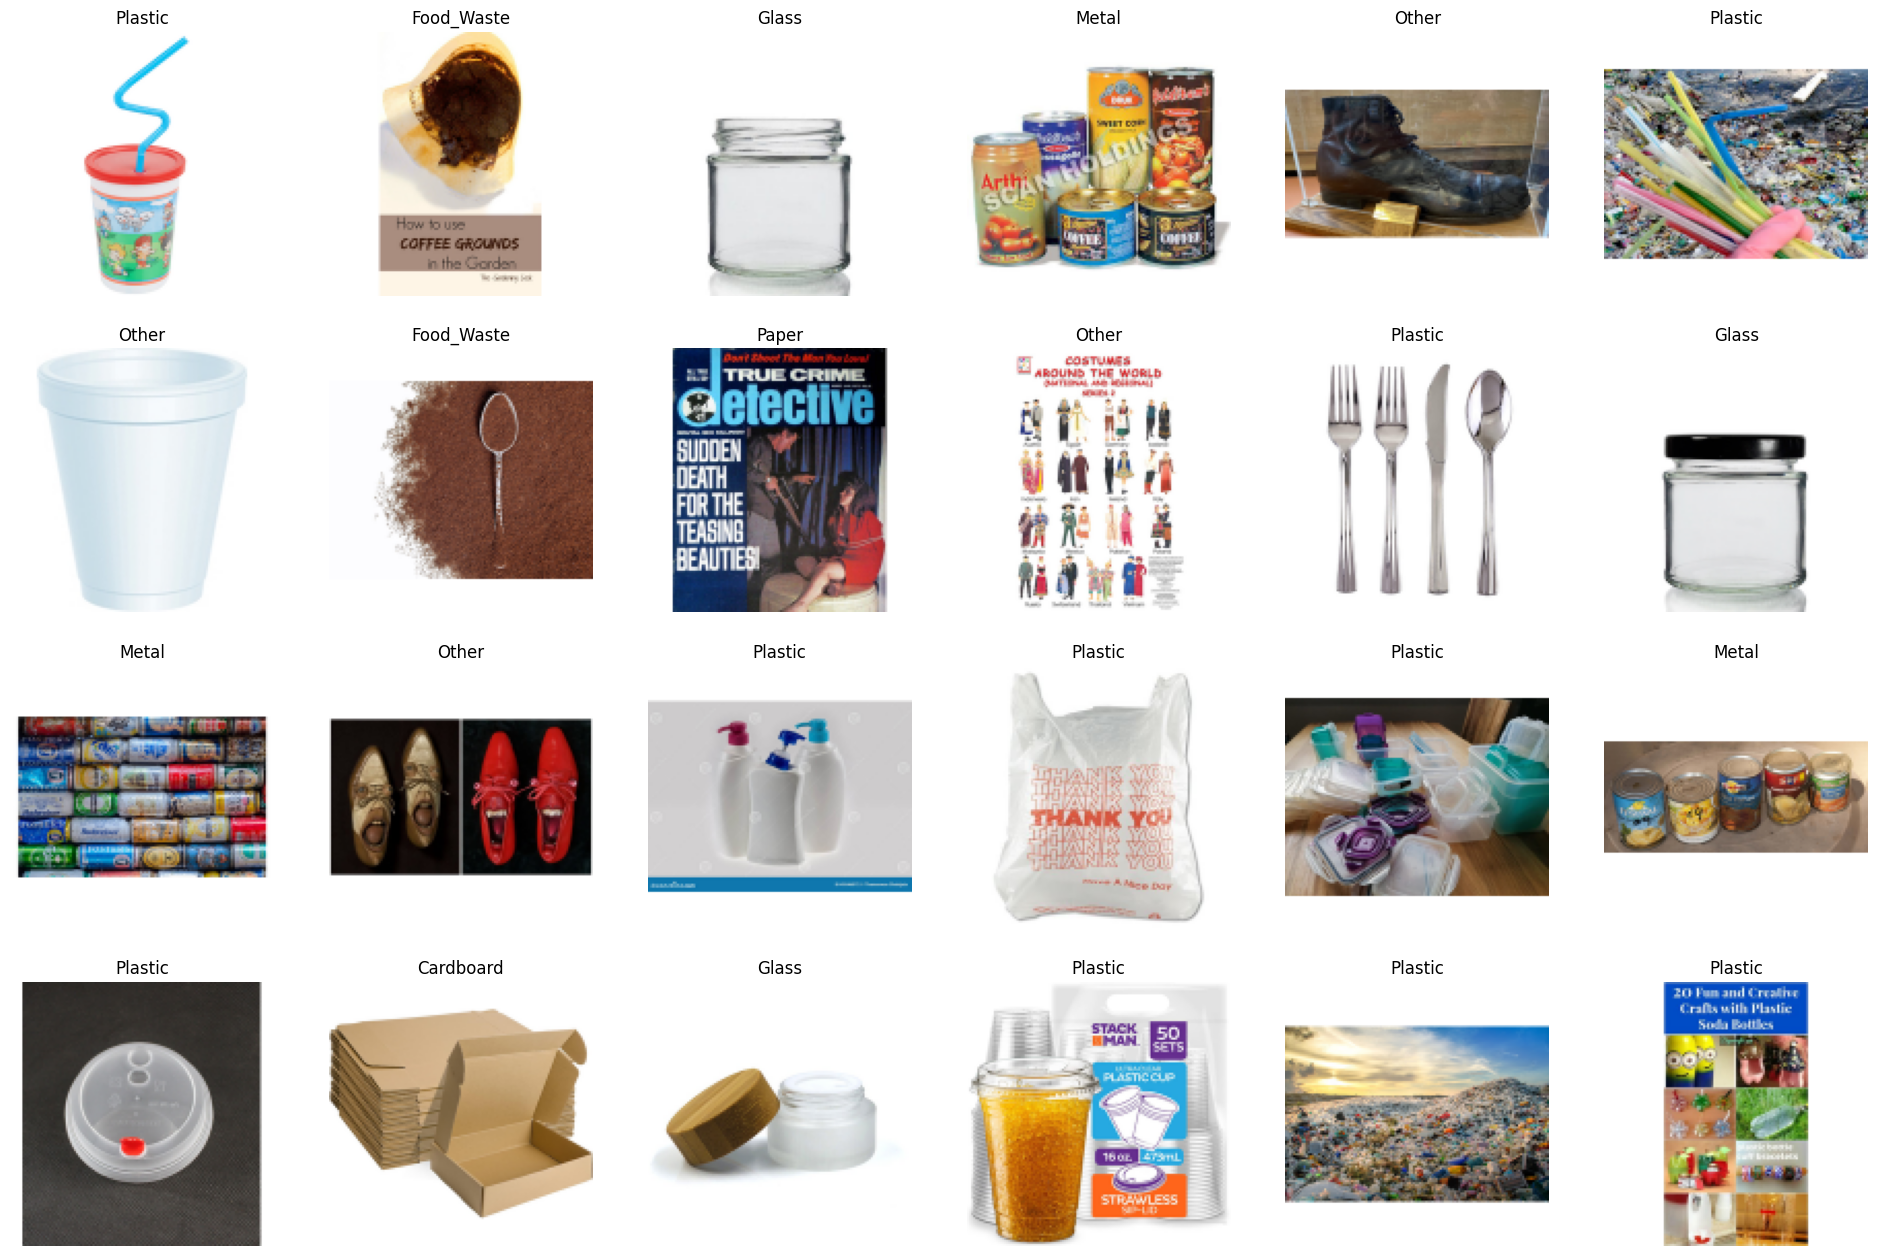

In [11]:
# Visualise Sample Images (across different labels)
for images, labels in image_data.take(2):
    plt.figure(figsize=(24, 24))
    for i in range(24): 
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels_cat[labels[i]])
        plt.axis("off")


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [12]:
# Find the smallest and largest image dimensions from the data set

# Function to find the smallest and largest image dimensions in the dataset
def find_image_dimensions(data_path):
    # Initialize variables
    min_size = None
    max_size = None
    min_file = ""
    max_file = ""
    
    # Traverse each class folder
    for category in os.listdir(data_path):
        category_path = os.path.join(data_path, category)
        if os.path.isdir(category_path):
            for filename in os.listdir(category_path):
                if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                    image_path = os.path.join(category_path, filename)
                    try:
                        with Image.open(image_path) as img:
                            width, height = img.size
                            size = (width, height)
    
                            if min_size is None or (width * height) < (min_size[0] * min_size[1]):
                                min_size = size
                                min_file = image_path
    
                            if max_size is None or (width * height) > (max_size[0] * max_size[1]):
                                max_size = size
                                max_file = image_path
                    except Exception as e:
                        print(f"Error reading {image_path}: {e}")
    return min_size, min_file, max_size, max_file

In [13]:
# Path to the root dataset directory
dataset_path = 'waste_data/data' 

# Call the function and print the results
min_size, min_file, max_size, max_file = find_image_dimensions(dataset_path)
print(f"\n📏 Smallest image: {min_file} → {min_size[0]}x{min_size[1]} (area: {min_size[0] * min_size[1]})")
print(f"🖼️ Largest image : {max_file} → {max_size[0]}x{max_size[1]} (area: {max_size[0] * max_size[1]})")


📏 Smallest image: waste_data/data\Cardboard\file_1.png → 256x256 (area: 65536)
🖼️ Largest image : waste_data/data\Cardboard\file_1.png → 256x256 (area: 65536)


In [14]:
# Resize the image dimensions

# Function to resize images to a fixed size
def resize_images(data_path, out_path, target_size=(128, 128)):
    if not os.path.exists(out_path):
        os.makedirs(out_path)
    
    for category_folder in os.listdir(data_path):
        category_path = os.path.join(data_path, category_folder)
        out_category_path = os.path.join(out_path, category_folder)
        
        if os.path.isdir(category_path):
            if not os.path.exists(out_category_path):
                os.makedirs(out_category_path)
            
            for filename in os.listdir(category_path):
                if filename.endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(category_path, filename)
                    out_img_path = os.path.join(out_category_path, filename)
                    
                    with Image.open(img_path) as img:
                        img_resized = img.resize(target_size)
                        img_resized.save(out_img_path)
    
    print(f"Images resized and saved to {out_path}")


In [15]:
# Call the function to resize images
output_path = os.path.join(extract_dir, 'resized_images')
resize_images(dataset_path, output_path, target_size=(128, 128))

Images resized and saved to waste_data\resized_images


In [16]:
# Get resized images and their labels
# Define the resized images directory to load images from
dir_resized = 'waste_data/resized_images'

# Use the function defined above to load images and labels
image_data_resized = load_images(dir_resized)

Found 7625 files belonging to 7 classes.


In [17]:
#Since we have loaded images using a TensorFlow Dataset (e.g., from image_dataset_from_directory), hence we convert images and labels to NumPy arrays first
image_list = []
label_list = []

for images, labels in image_data_resized:
    image_list.append(images.numpy())
    label_list.append(labels.numpy())

# Convert to NumPy arrays
images_np = np.concatenate(image_list)
labels_np = np.concatenate(label_list)

In [18]:
print(f"Resized images shape: {images_np.shape}")
print(f"Labels shape: {labels_np.shape}")

Resized images shape: (7625, 128, 128, 3)
Labels shape: (7625,)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

#### **2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [19]:
# Encode the labels suitably

from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_np)

# Display the mapping
# print("Encoded classes:",dict(zip(label_encoder.classes_,image_data.class_names)))

# Optionally one-hot encode for categorical_crossentropy
labels_onehot = to_categorical(labels_encoded)

# Display class mapping
print("Label Encoding Mapping:")
for class_name, class_index in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{labels_cat[class_index]} → {class_index}")

Label Encoding Mapping:
Cardboard → 0
Food_Waste → 1
Glass → 2
Metal → 3
Other → 4
Paper → 5
Plastic → 6


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [20]:
# Assign specified parts of the dataset to train and validation sets

# 80% train, 20% validation
X_train, X_test, y_train, y_test = train_test_split(
    images_np, 
    labels_onehot,               # image data and encoded labels
    test_size=0.2,
    stratify=labels_encoded,     # stratify to maintain class distribution
    random_state=42,
    shuffle=True
)

print(f"Training samples:   {X_train.shape[0]}")
print(f"Validation samples: {X_test.shape[0]}")

Training samples:   6100
Validation samples: 1525


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [21]:
# Build and compile the model

input_shape = X_train.shape[1:]  # Shape of the input images (128, 128, 3)
num_classes = y_train.shape[1]  # Number of classes (one-hot encoded labels)

# Define the model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
# Pooling Layer 1
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
# Pooling Layer 2
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
# Pooling Layer 3
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(128, activation='relu'))
# Dropout Layer 1
model.add(Dropout(0.5))  # Prevent overfitting
# Output Layer
model.add(Dense(num_classes, activation='softmax'))  

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,439 (12.61 MB)

 Trainable params: 3,305,991 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [22]:
# Training

In [23]:
#EarlyStopping – To halt training if the model stops improving

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

In [24]:
# ModelCheckpoint – To save the best model
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [25]:
# Train the model
history = model.fit(
    X_train,  # Normalize the images to [0, 1]
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=25, 
    batch_size=32, 
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.2650 - loss: 4.1795
Epoch 1: val_loss improved from inf to 1.85045, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 65s 331ms/step - accuracy: 0.2651 - loss: 4.1714 - val_accuracy: 0.3075 - val_loss: 1.8504
Epoch 2/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.3062 - loss: 1.8457
Epoch 2: val_loss did not improve from 1.85045
191/191 ━━━━━━━━━━━━━━━━━━━━ 63s 331ms/step - accuracy: 0.3061 - loss: 1.8457 - val_accuracy: 0.2754 - val_loss: 2.2131
Epoch 3/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.3120 - loss: 1.7840
Epoch 3: val_loss did not improve from 1.85045
191/191 ━━━━━━━━━━━━━━━━━━━━ 64s 336ms/step - accuracy: 0.3120 - loss: 1.7840 - val_accuracy: 0.2439 - val_loss: 2.5896
Epoch 4/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.3041 - loss: 1.8155
Epoch 4: val_loss improved from 1.85045 to 1.80578, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 64s 332ms/step - accuracy: 0.3041 - loss: 1.8155 - val_accuracy: 0.3089 - val_loss: 1.8058
Epoch 5/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.3180 - loss: 1.7800
Epoch 5: val_loss did not improve from 1.80578
191/191 ━━━━━━━━━━━━━━━━━━━━ 63s 331ms/step - accuracy: 0.3180 - loss: 1.7800 - val_accuracy: 0.2577 - val_loss: 3.5197
Epoch 6/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.3147 - loss: 1.7734
Epoch 6: val_loss did not improve from 1.80578
191/191 ━━━━━━━━━━━━━━━━━━━━ 63s 331ms/step - accuracy: 0.3147 - loss: 1.7734 - val_accuracy: 0.2977 - val_loss: 1.8353
Epoch 7/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.3141 - loss: 1.7264
Epoch 7: val_loss improved from 1.80578 to 1.70451, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 65s 341ms/step - accuracy: 0.3141 - loss: 1.7264 - val_accuracy: 0.3259 - val_loss: 1.7045
Epoch 8/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.3137 - loss: 1.6898
Epoch 8: val_loss did not improve from 1.70451
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 353ms/step - accuracy: 0.3137 - loss: 1.6899 - val_accuracy: 0.3279 - val_loss: 1.7552
Epoch 9/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.3132 - loss: 1.6966
Epoch 9: val_loss did not improve from 1.70451
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 353ms/step - accuracy: 0.3132 - loss: 1.6966 - val_accuracy: 0.3174 - val_loss: 1.7612
Epoch 10/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.3210 - loss: 1.6739
Epoch 10: val_loss improved from 1.70451 to 1.69996, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 70s 366ms/step - accuracy: 0.3210 - loss: 1.6739 - val_accuracy: 0.3279 - val_loss: 1.7000
Epoch 11/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.3117 - loss: 1.6728
Epoch 11: val_loss improved from 1.69996 to 1.69237, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 71s 371ms/step - accuracy: 0.3117 - loss: 1.6728 - val_accuracy: 0.3226 - val_loss: 1.6924
Epoch 12/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.3407 - loss: 1.6364
Epoch 12: val_loss did not improve from 1.69237
191/191 ━━━━━━━━━━━━━━━━━━━━ 70s 367ms/step - accuracy: 0.3408 - loss: 1.6363 - val_accuracy: 0.3718 - val_loss: 1.7122
Epoch 13/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.3380 - loss: 1.6452
Epoch 13: val_loss did not improve from 1.69237
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 353ms/step - accuracy: 0.3380 - loss: 1.6452 - val_accuracy: 0.3252 - val_loss: 4.9650
Epoch 14/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.3507 - loss: 1.6522
Epoch 14: val_loss did not improve from 1.69237
191/191 ━━━━━━━━━━━━━━━━━━━━ 68s 354ms/step - accuracy: 0.3507 - loss: 1.6522 - val_accuracy: 0.3823 - val_loss: 1.7190
Epoch 15/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.3665 - loss: 1.5854
Epoch 15: val_loss i

191/191 ━━━━━━━━━━━━━━━━━━━━ 69s 360ms/step - accuracy: 0.3664 - loss: 1.5855 - val_accuracy: 0.3954 - val_loss: 1.6570
Epoch 16/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.3578 - loss: 1.6085
Epoch 16: val_loss improved from 1.65697 to 1.61600, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 70s 364ms/step - accuracy: 0.3579 - loss: 1.6084 - val_accuracy: 0.3895 - val_loss: 1.6160
Epoch 17/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.3877 - loss: 1.5542
Epoch 17: val_loss did not improve from 1.61600
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 353ms/step - accuracy: 0.3876 - loss: 1.5543 - val_accuracy: 0.4079 - val_loss: 1.6383
Epoch 18/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.3925 - loss: 1.5402
Epoch 18: val_loss did not improve from 1.61600
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 349ms/step - accuracy: 0.3925 - loss: 1.5403 - val_accuracy: 0.2754 - val_loss: 3.1756
Epoch 19/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.4069 - loss: 1.5087
Epoch 19: val_loss improved from 1.61600 to 1.58314, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 65s 341ms/step - accuracy: 0.4068 - loss: 1.5087 - val_accuracy: 0.4151 - val_loss: 1.5831
Epoch 20/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.3857 - loss: 1.5230
Epoch 20: val_loss did not improve from 1.58314
191/191 ━━━━━━━━━━━━━━━━━━━━ 64s 334ms/step - accuracy: 0.3857 - loss: 1.5230 - val_accuracy: 0.3902 - val_loss: 2.5582
Epoch 21/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.4244 - loss: 1.4718
Epoch 21: val_loss did not improve from 1.58314
191/191 ━━━━━━━━━━━━━━━━━━━━ 65s 340ms/step - accuracy: 0.4244 - loss: 1.4719 - val_accuracy: 0.4013 - val_loss: 1.6842
Epoch 22/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.4159 - loss: 1.4599
Epoch 22: val_loss did not improve from 1.58314
191/191 ━━━━━━━━━━━━━━━━━━━━ 63s 328ms/step - accuracy: 0.4159 - loss: 1.4600 - val_accuracy: 0.3810 - val_loss: 2.0667
Epoch 23/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.4114 - loss: 1.4887
Epoch 23: val_loss d

191/191 ━━━━━━━━━━━━━━━━━━━━ 65s 339ms/step - accuracy: 0.4400 - loss: 1.4077 - val_accuracy: 0.4492 - val_loss: 1.5449
Restoring model weights from the end of the best epoch: 25.


> ### <span style="color: blue;"> Insights </span>
> <span style="color: blue;"> - Validation loss: 1.5449.</span>
>
> <span style="color: blue;"> - Low Accuracy: Validation Accuracy is 44.92%. That confirms the model struggles to separate classes.</span>

In [26]:
# Tuning the model with different combination of layers
model_tuned_1 = Sequential([
    #Convolutional layer 1
    Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2,2)),

    #Convolutional layer 2
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    #Convolutional layer 3
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_tuned_1.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_tuned_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 61, 61, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,251,463 (50.55 MB)

 Trainable params: 13,250,695 (50.55 MB)

 Non-trainable params: 768 (3.00 KB)

In [27]:
# Train the model
history1 = model_tuned_1.fit(
    X_train / 255.0,  # Normalize the images to [0, 1]
    y_train, 
    validation_data=(X_test / 255.0, y_test), 
    epochs=25, 
    batch_size=32, 
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - accuracy: 0.2059 - loss: 2.9095
Epoch 1: val_loss did not improve from 1.54488
191/191 ━━━━━━━━━━━━━━━━━━━━ 121s 621ms/step - accuracy: 0.2060 - loss: 2.9061 - val_accuracy: 0.0984 - val_loss: 6.2484
Epoch 2/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.2603 - loss: 1.9192
Epoch 2: val_loss did not improve from 1.54488
191/191 ━━━━━━━━━━━━━━━━━━━━ 116s 607ms/step - accuracy: 0.2603 - loss: 1.9192 - val_accuracy: 0.1049 - val_loss: 6.8141
Epoch 3/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.2822 - loss: 1.8899
Epoch 3: val_loss did not improve from 1.54488
191/191 ━━━━━━━━━━━━━━━━━━━━ 121s 632ms/step - accuracy: 0.2822 - loss: 1.8898 - val_accuracy: 0.2728 - val_loss: 3.4831
Epoch 4/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.2953 - loss: 1.8544
Epoch 4: val_loss did not improve from 1.54488
191/191 ━━━━━━━━━━━━━━━━━━━━ 120s 629ms/step - accuracy: 0.2953 - loss: 1.8544 - val_accuracy: 0.

191/191 ━━━━━━━━━━━━━━━━━━━━ 127s 665ms/step - accuracy: 0.3784 - loss: 1.5852 - val_accuracy: 0.4216 - val_loss: 1.5325
Epoch 17/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.3744 - loss: 1.6028
Epoch 17: val_loss did not improve from 1.53249
191/191 ━━━━━━━━━━━━━━━━━━━━ 126s 661ms/step - accuracy: 0.3744 - loss: 1.6027 - val_accuracy: 0.3816 - val_loss: 1.7086
Epoch 18/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.3867 - loss: 1.5557
Epoch 18: val_loss did not improve from 1.53249
191/191 ━━━━━━━━━━━━━━━━━━━━ 122s 637ms/step - accuracy: 0.3867 - loss: 1.5558 - val_accuracy: 0.4007 - val_loss: 1.5993
Epoch 19/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.3968 - loss: 1.5554
Epoch 19: val_loss did not improve from 1.53249
191/191 ━━━━━━━━━━━━━━━━━━━━ 121s 634ms/step - accuracy: 0.3968 - loss: 1.5553 - val_accuracy: 0.4203 - val_loss: 1.5912
Epoch 20/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.4060 - loss: 1.5019
Epoch 20: val_lo

191/191 ━━━━━━━━━━━━━━━━━━━━ 121s 631ms/step - accuracy: 0.4100 - loss: 1.4929 - val_accuracy: 0.4321 - val_loss: 1.4988
Epoch 22/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.4125 - loss: 1.4922
Epoch 22: val_loss did not improve from 1.49876
191/191 ━━━━━━━━━━━━━━━━━━━━ 120s 629ms/step - accuracy: 0.4125 - loss: 1.4922 - val_accuracy: 0.4275 - val_loss: 1.5469
Epoch 23/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.4155 - loss: 1.4565
Epoch 23: val_loss did not improve from 1.49876
191/191 ━━━━━━━━━━━━━━━━━━━━ 120s 629ms/step - accuracy: 0.4155 - loss: 1.4565 - val_accuracy: 0.4105 - val_loss: 1.6085
Epoch 24/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.4222 - loss: 1.4407
Epoch 24: val_loss did not improve from 1.49876
191/191 ━━━━━━━━━━━━━━━━━━━━ 121s 632ms/step - accuracy: 0.4222 - loss: 1.4407 - val_accuracy: 0.4374 - val_loss: 1.6618
Epoch 25/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.4292 - loss: 1.4415
Epoch 25: val_lo

> ### <span style="color: blue;"> Insights </span>
> <span style="color: blue;"> - Validation loss dropped to 1.4988.</span>
>
> <span style="color: blue;"> - But Validation Accuracy dropped little from 44.92% to 43.21% as per epoch 21.</span>

In [28]:
# Tuning the model more with different combination of layers
model_tuned_2 = Sequential([
    #Convolutional layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    #Convolutional layer 2
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    #Convolutional layer 3
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    #Convolutional layer 4
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_tuned_2.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_tuned_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,783,687 (10.62 MB)

 Trainable params: 2,782,727 (10.62 MB)

 Non-trainable params: 960 (3.75 KB)

In [29]:
# Train the model
history2 = model_tuned_2.fit(
    X_train / 255.0,  # Normalize the images to [0, 1]
    y_train, 
    validation_data=(X_test / 255.0, y_test), 
    epochs=25, 
    batch_size=32, 
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.2374 - loss: 2.6130
Epoch 1: val_loss did not improve from 1.49876
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 335ms/step - accuracy: 0.2376 - loss: 2.6105 - val_accuracy: 0.1351 - val_loss: 2.4208
Epoch 2/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.3292 - loss: 1.7592
Epoch 2: val_loss did not improve from 1.49876
191/191 ━━━━━━━━━━━━━━━━━━━━ 64s 332ms/step - accuracy: 0.3292 - loss: 1.7593 - val_accuracy: 0.3174 - val_loss: 1.7275
Epoch 3/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.3558 - loss: 1.6963
Epoch 3: val_loss did not improve from 1.49876
191/191 ━━━━━━━━━━━━━━━━━━━━ 64s 333ms/step - accuracy: 0.3558 - loss: 1.6963 - val_accuracy: 0.4170 - val_loss: 1.5761
Epoch 4/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.3783 - loss: 1.6263
Epoch 4: val_loss did not improve from 1.49876
191/191 ━━━━━━━━━━━━━━━━━━━━ 65s 341ms/step - accuracy: 0.3784 - loss: 1.6264 - val_accuracy: 0.4393

191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 348ms/step - accuracy: 0.4176 - loss: 1.5398 - val_accuracy: 0.4885 - val_loss: 1.4121
Epoch 6/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.4517 - loss: 1.4434
Epoch 6: val_loss improved from 1.41214 to 1.40833, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 348ms/step - accuracy: 0.4517 - loss: 1.4433 - val_accuracy: 0.4846 - val_loss: 1.4083
Epoch 7/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.4806 - loss: 1.3962
Epoch 7: val_loss improved from 1.40833 to 1.35260, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 347ms/step - accuracy: 0.4806 - loss: 1.3962 - val_accuracy: 0.5246 - val_loss: 1.3526
Epoch 8/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.5290 - loss: 1.2716
Epoch 8: val_loss improved from 1.35260 to 1.32141, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 347ms/step - accuracy: 0.5289 - loss: 1.2717 - val_accuracy: 0.5397 - val_loss: 1.3214
Epoch 9/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.5350 - loss: 1.2435
Epoch 9: val_loss improved from 1.32141 to 1.25830, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 346ms/step - accuracy: 0.5350 - loss: 1.2435 - val_accuracy: 0.5521 - val_loss: 1.2583
Epoch 10/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.5913 - loss: 1.1260
Epoch 10: val_loss did not improve from 1.25830
191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 347ms/step - accuracy: 0.5913 - loss: 1.1260 - val_accuracy: 0.5279 - val_loss: 1.3039
Epoch 11/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.5943 - loss: 1.0786
Epoch 11: val_loss improved from 1.25830 to 1.20528, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 346ms/step - accuracy: 0.5943 - loss: 1.0786 - val_accuracy: 0.5908 - val_loss: 1.2053
Epoch 12/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.6472 - loss: 0.9754
Epoch 12: val_loss improved from 1.20528 to 1.18012, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 346ms/step - accuracy: 0.6471 - loss: 0.9754 - val_accuracy: 0.5875 - val_loss: 1.1801
Epoch 13/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.6644 - loss: 0.9359
Epoch 13: val_loss improved from 1.18012 to 1.15653, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 347ms/step - accuracy: 0.6643 - loss: 0.9359 - val_accuracy: 0.5967 - val_loss: 1.1565
Epoch 14/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.6946 - loss: 0.8444
Epoch 14: val_loss did not improve from 1.15653
191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 347ms/step - accuracy: 0.6946 - loss: 0.8444 - val_accuracy: 0.6092 - val_loss: 1.1615
Epoch 15/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.7128 - loss: 0.8136
Epoch 15: val_loss did not improve from 1.15653
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 350ms/step - accuracy: 0.7128 - loss: 0.8135 - val_accuracy: 0.5895 - val_loss: 1.2295
Epoch 16/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.7356 - loss: 0.7251
Epoch 16: val_loss did not improve from 1.15653
191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 347ms/step - accuracy: 0.7356 - loss: 0.7251 - val_accuracy: 0.5954 - val_loss: 1.1988
Epoch 17/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.7648 - loss: 0.6615
Epoch 17: val_loss i

191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 348ms/step - accuracy: 0.7649 - loss: 0.6615 - val_accuracy: 0.6315 - val_loss: 1.1305
Epoch 18/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.7785 - loss: 0.6304
Epoch 18: val_loss did not improve from 1.13048
191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 346ms/step - accuracy: 0.7785 - loss: 0.6304 - val_accuracy: 0.6439 - val_loss: 1.1416
Epoch 19/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.7994 - loss: 0.5708
Epoch 19: val_loss improved from 1.13048 to 1.09778, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 346ms/step - accuracy: 0.7994 - loss: 0.5708 - val_accuracy: 0.6511 - val_loss: 1.0978
Epoch 20/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.8208 - loss: 0.5137
Epoch 20: val_loss did not improve from 1.09778
191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 346ms/step - accuracy: 0.8207 - loss: 0.5137 - val_accuracy: 0.6439 - val_loss: 1.1618
Epoch 21/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.8327 - loss: 0.4797
Epoch 21: val_loss improved from 1.09778 to 1.04992, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 347ms/step - accuracy: 0.8327 - loss: 0.4797 - val_accuracy: 0.6702 - val_loss: 1.0499
Epoch 22/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.8408 - loss: 0.4598
Epoch 22: val_loss did not improve from 1.04992
191/191 ━━━━━━━━━━━━━━━━━━━━ 69s 359ms/step - accuracy: 0.8409 - loss: 0.4597 - val_accuracy: 0.6780 - val_loss: 1.1794
Epoch 23/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.8626 - loss: 0.3906
Epoch 23: val_loss did not improve from 1.04992
191/191 ━━━━━━━━━━━━━━━━━━━━ 68s 355ms/step - accuracy: 0.8626 - loss: 0.3906 - val_accuracy: 0.6728 - val_loss: 1.1566
Epoch 24/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.8754 - loss: 0.3702
Epoch 24: val_loss did not improve from 1.04992
191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 346ms/step - accuracy: 0.8754 - loss: 0.3703 - val_accuracy: 0.6643 - val_loss: 1.2137
Epoch 25/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.8886 - loss: 0.3194
Epoch 25: val_loss d

> #### <span style="color: blue;"> What’s Improved</span>
> <span style="color: blue;">- Validation accuracy jumped from ~43% to ~67% compared to your earlier custom model.</span>
>
> <span style="color: blue;">- Loss values are consistently decreasing, showing healthy gradient flow.</span>
>
> <span style="color: blue;">- Model tuned with lower learning rate, simpler architecture, and smaller input size is now learning meaningfully, especially given class imbalance.</span>

> #### <span style="color: blue;">What’s Still Limitations</span>
> <span style="color: blue;">- ~67% accuracy suggests the model is on its way but not yet optimal for real-world deployment.</span>
> 
> <span style="color: blue;">- The confusion matrix (once we plot it) will likely show misclassification in certain overlapping classes (e.g. Plastic vs Cardboard).</span>


In [38]:
#Visualize Accuracy & Loss Curves

def plot_training_curves(history, title='Model Training'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'g-', label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'g-', label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot curves for model_tuned
plot_training_curves(history2, title='Tuned CNN Model')

> ## <span style="color: blue;"> 📈 Training Curves – Tuned CNN Model </span>
>
> ### <span style="color: blue;"> ✅ Accuracy Trends </span>
> <span style="color: blue;"> - **Training accuracy** steadily improves from ~23% to ~89% over 25 epochs. </span>
>
> <span style="color: blue;"> - **Validation accuracy** follows a similar upward trend, peaking near **67%**, showing good generalization. </span>
>
> ### <span style="color: blue;"> 📉 Loss Trends </span>
> <span style="color: blue;"> - **Training loss** gradually decreases from ~2.6 to ~0.32, reflecting consistent learning. </span>
>
> <span style="color: blue;"> - **Validation loss** drops sharply early on (from ~2.4 to ~1.04). </span>
>
> ---
>
> ### <span style="color: blue;"> 🔍 Insight Summary </span>
> <span style="color: blue;"> - The tuned CNN shows clear signs of **effective learning** after model simplification. </span>

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [54]:
# Evaluate on the test set; display suitable metrics

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step


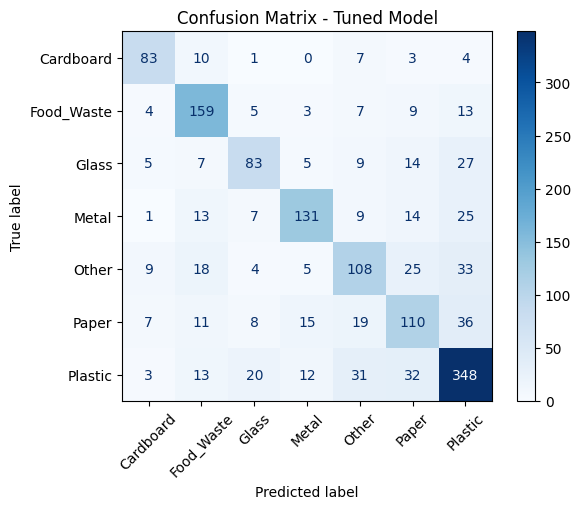

In [56]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Evaluate the model on the validation set
y_test_pred = model_tuned_2.predict(X_test / 255.0)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_true_labels = np.argmax(y_test, axis=1)

# Compute and plot confusion matrix
cm = confusion_matrix(y_test_true_labels, y_test_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_cat)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix - Tuned Model')
plt.show()


> ### <span style="color: blue;">Confusion Matrix Insights </span>
> <span style="color: blue;"> - The **diagonal cells** glow brighter — strong signs of correct classification.</span>
> 
> <span style="color: blue;"> - **Plastic (bottom row)** has higher dark diagonal hits compared to other categories.</span>
> 
> <span style="color: blue;"> - **Glass, Metal, Other** has fewer off-diagonal errors.</span>

In [59]:
from sklearn.metrics import classification_report

# Classification Report for validation set
print("Classification Report for Validation Set:")
print(classification_report(y_test_true_labels, y_test_pred_labels, target_names=labels_cat))

Classification Report for Validation Set:
              precision    recall  f1-score   support

   Cardboard       0.74      0.77      0.75       108
  Food_Waste       0.69      0.80      0.74       200
       Glass       0.65      0.55      0.60       150
       Metal       0.77      0.66      0.71       200
       Other       0.57      0.53      0.55       202
       Paper       0.53      0.53      0.53       206
     Plastic       0.72      0.76      0.74       459

    accuracy                           0.67      1525
   macro avg       0.67      0.66      0.66      1525
weighted avg       0.67      0.67      0.67      1525



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [64]:
# Define augmentation steps to augment images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation steps
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [65]:
# Create a function to augment the images
def augment_images(images, labels, datagen, augment_factor=2):
    augmented_images = []
    augmented_labels = []
    
    for img, label in zip(images, labels):
        img = img.reshape((1,) + img.shape)  # Add batch dimension
        for _ in range(augment_factor):
            aug_iter = datagen.flow(img, batch_size=1)
            aug_img = next(aug_iter)[0]
            augmented_images.append(aug_img)
            augmented_labels.append(label)
    
    return np.array(augmented_images), np.array(augmented_labels)


In [66]:
# Create the augmented training dataset
aug_images, aug_labels = augment_images(X_train, y_train, datagen)

print("Augmented training set size:", aug_images.shape)

Augmented training set size: (12200, 128, 128, 3)


##### **4.1.2**

Train the model on the new augmented dataset.

In [71]:
# Train the model using augmented images
history_aug = model_tuned_2.fit(
    aug_images, aug_labels,
    validation_data=(X_test / 255.0, y_test), 
    epochs=25, 
    batch_size=32, 
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Evaluate augmented model
val_loss_aug, val_accuracy_aug = model_tuned_2.evaluate(X_test / 255.0, y_test)
print(f"Augmented Validation Loss: {val_loss_aug:.4f}")
print(f"Augmented Validation Accuracy: {val_accuracy_aug:.4f}")

Epoch 1/25
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.7462 - loss: 0.7143
Epoch 1: val_loss did not improve from 1.04992
382/382 ━━━━━━━━━━━━━━━━━━━━ 133s 347ms/step - accuracy: 0.7462 - loss: 0.7144 - val_accuracy: 0.6059 - val_loss: 1.3215
Epoch 2/25
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.7631 - loss: 0.6538
Epoch 2: val_loss did not improve from 1.04992
382/382 ━━━━━━━━━━━━━━━━━━━━ 130s 340ms/step - accuracy: 0.7631 - loss: 0.6538 - val_accuracy: 0.6367 - val_loss: 1.3344
Epoch 3/25
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.7741 - loss: 0.6417
Epoch 3: val_loss did not improve from 1.04992
382/382 ━━━━━━━━━━━━━━━━━━━━ 128s 336ms/step - accuracy: 0.7741 - loss: 0.6417 - val_accuracy: 0.5954 - val_loss: 1.3568
Epoch 4/25
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.7939 - loss: 0.5894
Epoch 4: val_loss did not improve from 1.04992
382/382 ━━━━━━━━━━━━━━━━━━━━ 131s 344ms/step - accuracy: 0.7940 - loss: 0.5894 - val_accuracy: 0.

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

In [74]:
# Calculate accuracy
accu_score = accuracy_score(y_test_true_labels, y_test_pred_labels)
# Calculate precision, recall, and F1 score
precision_score = precision_score(y_test_true_labels, y_test_pred_labels, average='weighted')
recall_score = recall_score(y_test_true_labels, y_test_pred_labels, average='weighted')
f1_score = f1_score(y_test_true_labels, y_test_pred_labels, average='weighted')

print(f"Accuracy: {accu_score:.4f}")
print(f"Precision: {precision_score:.4f}")
print(f"Recall: {recall_score:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.6702
Precision: 0.6696
Recall: 0.6702
F1 Score: 0.6682


## <span style="color: blue;"> 🔍 Findings about the data
>
> ### <span style="color: blue;">Dataset Composition:
> <span style="color: blue;"> - The dataset consists of images from 7 different categories, namely `Cardboard`, `Food_Waste`, `Glass`, `Metal`, `Paper`, `Plastic` and `Other`.
>
> <span style="color: blue;"> - Each class is represented by a folder containing images of Objects belonging to each category.
>
> ### <span style="color: blue;">Class Distribution:
> <span style="color: blue;"> -- The dataset has an imbalanced distribution of images across the classes as observed from the bar plot of class distribution.
> 
> <span style="color: blue;"> - `Plastic` has siginificantly more images(2295) than other categories, `Cardboard` has very low images(540).
> 
> <span style="color: blue;"> - This might affect model performance.
>
> ### <span style="color: blue;">Image Characterristics:
> <span style="color: blue;"> - Images in data set are present in `.png` format.
> 
> <span style="color: blue;"> - Resize operation was performed to standardize all images to 128x128 pixels size.
>
> ### <span style="color: blue;">Label Encoding:
> <span style="color: blue;"> - Labels were extracted from folder names and encoded into numerical values.
> 
> <span style="color: blue;"> - One-hot encoding was applied to prepare the labels for model traning.
>
> ### <span style="color: blue;">Data Splitting:
> <span style="color: blue;"> - Dataset was split into training & validation sets using 80:20, ensuring the stratification to maintain class distribution in both sets.
>
> ### <span style="color: blue;">Potential Issues:
> <span style="color: blue;"> - Dataset contains class imbalance, which may require techniques like data augumentation or class weighting to improve model performance.
> 
> <span style="color: blue;"> - Some images have overlapping feature between classes, making classification more challenging.


---

## <span style="color: blue;">📊 Model training results
>
> ### <span style="color: blue;">Model Architecture:
> <span style="color: blue;"> - Model consists of 4 convolutional layers with ReLU activation, followed by batch normalization and max-pooling layers.
>
> <span style="color: blue;"> - Dropout layers were added to prevent overfitting.
>
> <span style="color: blue;"> - Fully connected layers were used for classification, with final layer using a softmax activation for multi-class classification.
>
> ### <span style="color: blue;">Training Process:
> <span style="color: blue;"> - Model was trained using ADAM Optimizer and Categorical Cross-Entropy Loss.
>
> <span style="color: blue;"> - Early stopping, model checkpointing were used for optimization and preventing overfitting.
>
> ### <span style="color: blue;">Performace Metics:
> <span style="color: blue;"> - **Accuracy:** Model achieved an accuracy of approx. 67% on validation set.
>
> <span style="color: blue;"> - **Precision:** Precision scroe is ~67%.
>
> <span style="color: blue;"> - **Recall:** Recall Score is ~67%.
>
> <span style="color: blue;"> - **F1 Score:** F1 Score is ~67%.
>
> ### <span style="color: blue;">Confusion Matrix:
> <span style="color: blue;">- Confusion matrix revealed that certain class, such as `Plastic` and `Food_Waste`, are classified more accurately that others due to class imbalance.

--- 

## <span style="color: blue;">🎯 Conclusion
>
> <span style="color: blue;">1. **Data-related Improvements**
>
> <span style="color: blue;">   - Implement data augmentation to address class imbalance.
>
> <span style="color: blue;">   - Collect more samples for under represented classes (specially Cardboard).
>
> <span style="color: blue;">   - Include more diverse images within each category.
>
> <span style="color: blue;">2. **Model Enhancements**
>
> <span style="color: blue;">   - Experiment with deeper architectures or pre-trained models.
>
> <span style="color: blue;">   - Implement class weights to handle imbalanced data.
>
> <span style="color: blue;">   - Try different optimization strategies and hyperparameters.
>
> <span style="color: blue;">3. **Practical Applications**
>
> <span style="color: blue;">   - Could be integrated into automated waste sorting systems.
>
> <span style="color: blue;">   - Potential for mobile applications for consumer waste sorting.
>
> <span style="color: blue;">   - Useful for recycling facilities and waste management education.



 <span style="color: blue;">This demonstrates the potential of CNN-based approaches for waste segregation while highlighting areas for future improvement in both data collection and model architecture.